[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Borgers-Examples-in-BMTK/blob/main/26-Pulse-Coupled/26_Pulse_Coupled.ipynb)

# Chapter 26 - Two Pulse Coupled Oscillators
#### by Matthew Stroud and Gregory Glickert
In this notebook, two g functions are explored that give very different spiking behavior: synchronization and anti-synchronization

This notebook does not use BMTK.

## 1) g=phi^2 * (1-phi)

We initialize phi for cell A and B with cell A firing once at time 0.

In [1]:
phi_A=0
phi_B=0.5             
num_spikes_A=1
num_spikes_B=0 
t_spikes_A=[0]
t_spikes_B=[]   

We need to define g and f functions:

In [2]:
def g(phi):
    return (phi**2) *(1-phi)


def f(phi):
    return phi + g(phi)

Update both cells sequentially 12 times.

In [3]:
N=12                          
t=0
for n in range(N):
   t = t+(1-phi_B)               
   num_spikes_B = num_spikes_B+1
   t_spikes_B.append(t)
   phi_A = f(1-phi_B)            
   phi_B = 0                    
   t=t+(1-phi_A)             
   num_spikes_A = num_spikes_A+1
   t_spikes_A.append(t)
   phi_B=f(1- phi_A)
   phi_A=0


Displaying the cell spikes:

Text(0.5, 1.0, 'spike times of A(blue) and B(orange)')

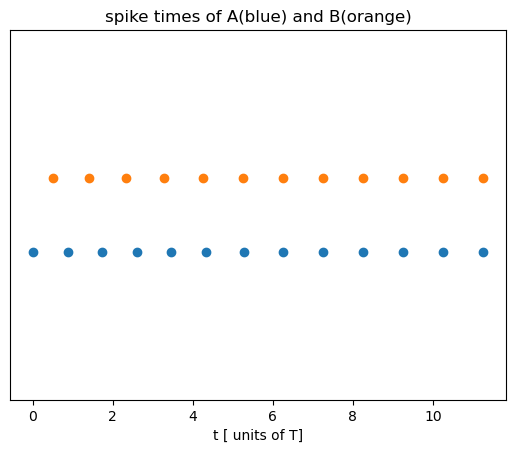

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(t_spikes_A,np.ones((num_spikes_A,1)),'o')

plt.plot(t_spikes_B,2*np.ones((num_spikes_B,1)),'o')

plt.ylim([-1,4])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.xlabel('t [ units of T]')
plt.title('spike times of A(blue) and B(orange)')
plt.show()

Two pulse coupled oscillators synchronize 

### 2)  g(phi) = 2phi*(1-phi)^3

In [5]:
phi_A=0.1
phi_B=0.1            
num_spikes_A=1
num_spikes_B=0 
t_spikes_A=[0]
t_spikes_B=[]   

In [6]:
def g_2(phi):
    return (phi*2)*((1-phi)**3)


def f_2(phi):
    return phi + g_2(phi)

In [7]:
N=12                          
t=0
for n in range(N):
   t = t+(1-phi_B)               
   num_spikes_B = num_spikes_B+1
   t_spikes_B.append(t)
   phi_A = f_2(1-phi_B)            
   phi_B = 0                    
   t=t+(1-phi_A)             
   num_spikes_A = num_spikes_A+1
   t_spikes_A.append(t)
   phi_B=f_2(1- phi_A)
   phi_A=0

Text(0.5, 1.0, 'spike times of A(blue) and B(orange)')

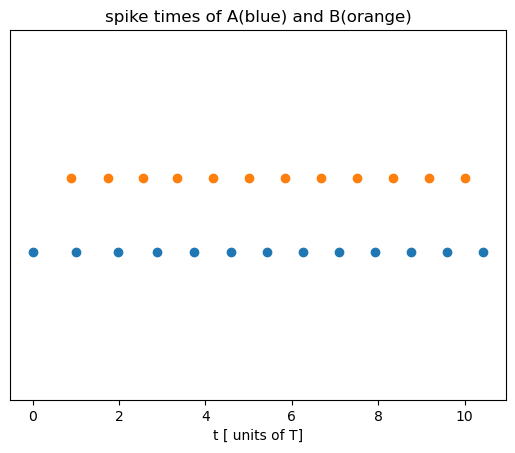

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(t_spikes_A,np.ones((num_spikes_A,1)),'o')

plt.plot(t_spikes_B,2*np.ones((num_spikes_B,1)),'o')

plt.ylim([-1,4])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.xlabel('t [ units of T]')
plt.title('spike times of A(blue) and B(orange)')
plt.show()

Two oscillators with new g function anti-synchronize